Support vector machine can be used for for classification and regression. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from IPython.html.widgets import interact
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC 

In [12]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

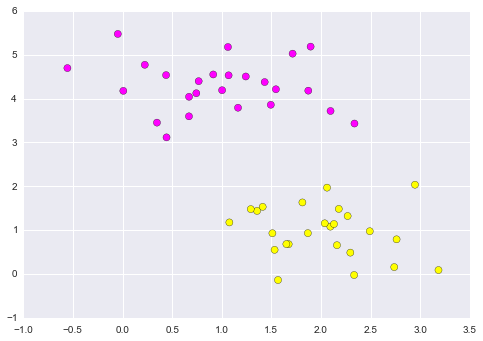

In [16]:
from sklearn.datasets.samples_generator import make_blobs
#make_blobs will create n cluster  
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

Task here is to draw a decision boundary between two classes. Here can be many decision boundary which can perfectly separate these two classes. 

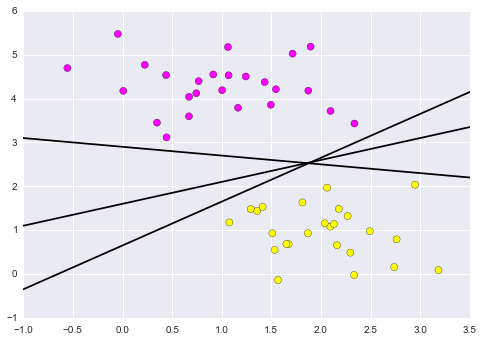

In [17]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

But, we have to maximize the margin between two classes. 

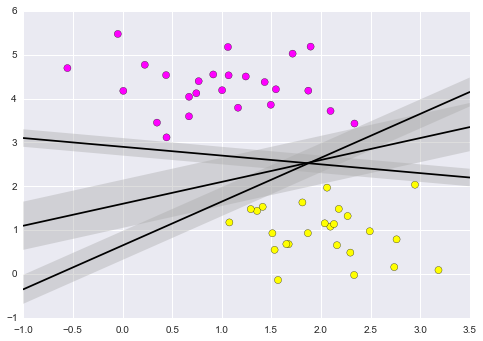

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

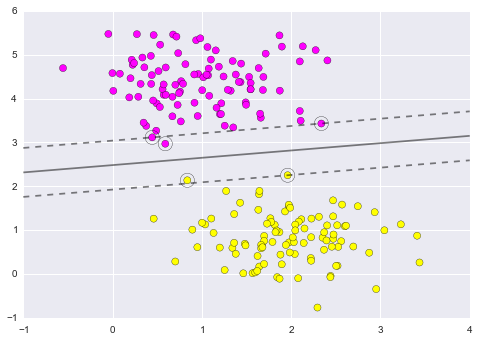

In [19]:
from IPython.html.widgets import interact

def plot_svm(N=10):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

**Feature Expansion**: Some time, its not possible to draw a linear boundary between two classes. In this case , increasing the feature space can be helpful. 

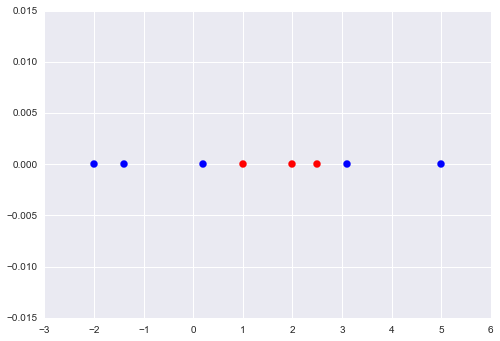

In [20]:
reds = np.array([1, 2, 2.5])
blues = np.array([-2, -1.4, 0.2, 3.1, 5])

plt.scatter(reds, [0]*len(reds), color='r', s=50)
plt.scatter(blues, [0]*len(blues), color='b', s=50)

Here we have one dimensional data, which is not linearly separable. 

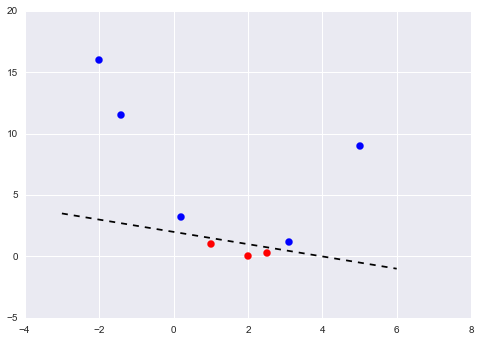

In [24]:
func = lambda x: (x - 2) **2

red_features = [reds, func(reds)]
blue_features = [blues, func(blues)]

#plt.scatter(reds, [0]*len(reds), color='r', s=20)
#plt.scatter(blues, [0]*len(blues), color='b', s=20)

plt.scatter(*red_features, color='r',s=50)
plt.scatter(*blue_features, color='b',s=50)

xvals = np.linspace(-3, 6)
plt.plot(xvals, 2 - 0.5*xvals, 'k--');

Here calulating the polynomial can be very expensive.Another better alternative to this problem is to use kernel function. 

**kernel function** is defined as a function that corresponds to a dot product of two feature vectors in some expanded feature space.

You can think of kernels as dot products where we can "cheat" and calculate the value of the dot product between two points without having to explicitly calculate all their feature values. This shortcut is generally referred to as the kernel trick


**Why kernel trick is computationally more effective**

 for example $x=(x_1,x_2,x_3); y=(y_1,y_2,y_3)$               
 then for the function $f(x) = (x_1x_1, x_1x_2, x_1x_3, x_2x_1, x_2x_2, x_2x_3, x_3x_1, x_3x_2, x_3x_3)$    
 the kernel function would be $K(x,y) = (<x,y>)^2$
 
 Let's look at an example
 
 suppose $x = (1,2,3); y =(4,5,6)$     
 then $f(x) = (1,2,3,2,4,6,3,6,9)$     
 $f(y) = (16,20,24,20,25,36,24,30,36)$
 
 $<f(x), f(y)> = 16 + 40 + 72 + 40 + 100 + 180 + 72 + 180 + 324 = 1024$
 
 Now, lets use Kernel instead: 
 $K(x,y) = (4+10+18)^2 = 32^2 = 1024$

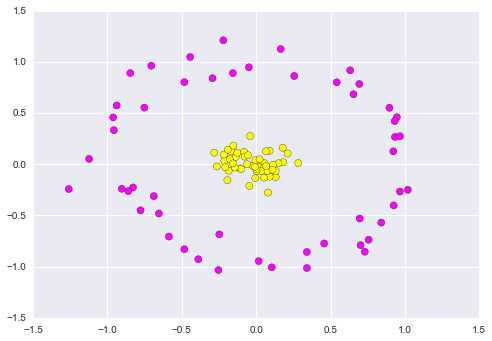

In [31]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

Here , data is not linearlly separable, so we will use kernel function to classify it.

In [39]:
# radial basis function 
#r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))
r = np.exp(-(X[:, 0] - X[:, 1]) ** 2)

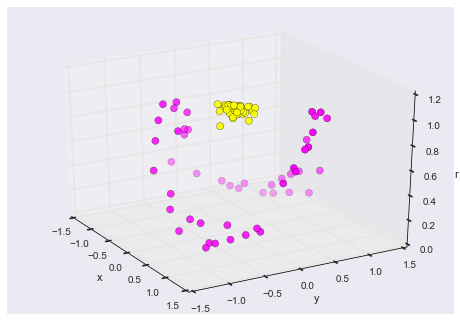

In [40]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

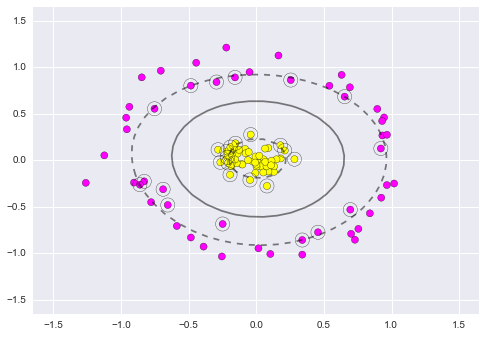

In [41]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');